## Regex Search

In [ ]:
## Setting inputs for function

###

### Inputs to filtering function (Replace with your own)
input_folder_path = 'arxiv_data'
output_folder_path = 'data'
metadata_keys = ['timestamp', 'yymm', 'arxiv_id', 'language', 'url']
filename="filtered_data_v2.csv"
total_texts_filename="total_texts_v2.txt"

### Window size for context window extraction
window_size = 200 # 200 bp window size

### Importing Regex  

In [36]:
import sys
sys.path.append('regex')
from regex_definitions import compiled_auroc_regex, compiled_auprc_regex

### Importing regex filtering function

In [1]:
# Importing necessary functions and keyword lists
import sys
sys.path.append('src')  # Ensure the 'src' folder is in the Python path
from arxiv_search_regex import jsonl_folder_filtering

### Filter

In [4]:
# Call the function
df_output = jsonl_folder_filtering(
    input_folder_path=input_folder_path,
    auroc_regex=compiled_auroc_regex,
    auprc_regex=compiled_auprc_regex,
    metadata_keys=metadata_keys,
    output_folder_path=output_folder_path,
    remove_latex=True,
    save_file=True,
    filename=filename,  # Changed to .csv for clarity
    total_texts_filename=total_texts_filename
)

## Visualizing number of citations over time

'figures/papers_over_time.png'

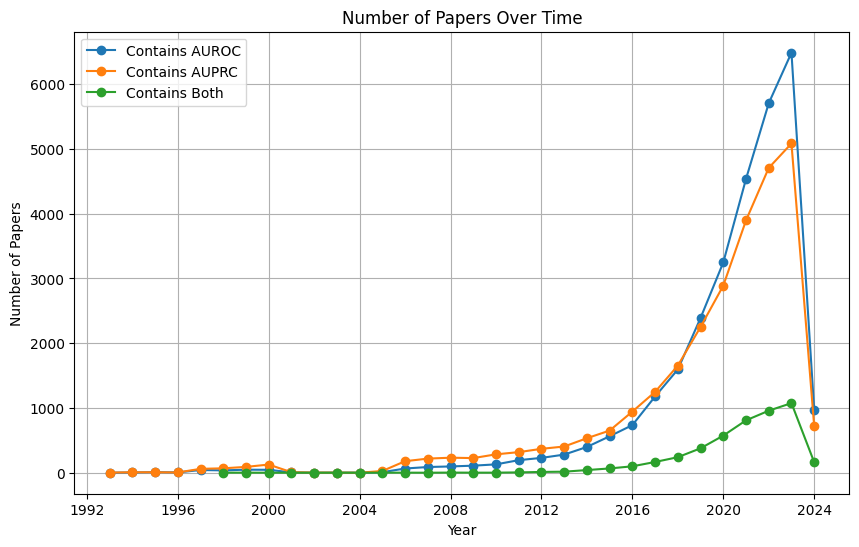

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# Convert timestamp to datetime
df_output['timestamp'] = pd.to_datetime(df_output['timestamp'])

# Resample data by year
df_yearly = df_output.resample('Y', on='timestamp').agg({'contains_auroc': 'sum', 'contains_auprc': 'sum'})

# Calculate papers that contain both
df_yearly['contains_both'] = df_output[(df_output['contains_auroc'] == True) & (df_output['contains_auprc'] == True)].resample('Y', on='timestamp').size()

# File path for the figure
figures_dir = "figures"
figure_path = os.path.join(figures_dir, 'papers_over_time.png')

# Save the figure
plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly['contains_auroc'], label='Contains AUROC', marker='o')
plt.plot(df_yearly.index, df_yearly['contains_auprc'], label='Contains AUPRC', marker='o')
plt.plot(df_yearly.index, df_yearly['contains_both'], label='Contains Both', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers Over Time')
plt.legend()
plt.grid(True)
plt.savefig(figure_path)

figure_path

### Filtering only data that contains AUROC and AUPRC keywords

In [33]:
df_output = pd.read_csv("data/filtered_data_v2.csv")
df_filtered_v2 = df_output[(df_output['contains_auroc'] == True) & (df_output['contains_auprc'] == True)]

### Importing function to extract context window

In [37]:
# Importing necessary functions and keyword lists
import sys
sys.path.append('src')  # Ensure the 'src' folder is in the Python path

from claim_search_v3 import extract_context_windows_df
compiled_regexes = [compiled_auroc_regex, compiled_auprc_regex]

### Extracting

In [38]:
df_with_context_windows = extract_context_windows_df(df_filtered_v2, 'text', [compiled_auroc_regex, compiled_auprc_regex], window_size=window_size)

### Saving

In [ ]:
df_with_context_windows.to_csv('data/filtered_data_with_context_windows_v4.csv', index=False)